In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib

## The Setup:
#### Will be used to set up the main data

In [77]:
# Getting the sheets into a df
q1 = pd.read_excel("data/raw/avg_credit_small.xlsx", "2020Q1")
q2 = pd.read_excel("data/raw/avg_credit_small.xlsx", "2020Q2")
q3 = pd.read_excel("data/raw/avg_credit_small.xlsx", "2020Q3")

In [78]:
# Setting the index as the so they are labelled correctly
q1 = q1.set_index("City")
q2 = q2.set_index("City")
q3 = q3.set_index("City")

In [79]:
# Fixing the columns after transposition
q1 = q1.T
q1.columns.name = ""

q2 = q2.T
q2.columns.name = ""

q3 = q3.T
q3.columns.name = ""

## The Visualization:
#### Be impressed!

In [80]:
# code from https://stackoverflow.com/questions/41470416/python-3d-plot-for-multiple-dataframes/41602903#41602903

In [81]:
sns.set()

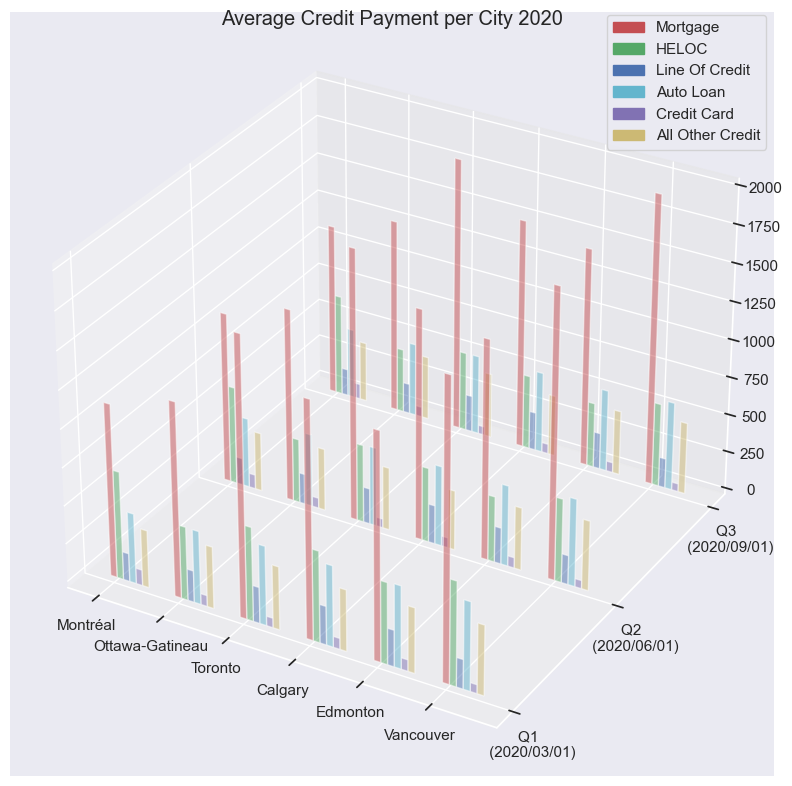

In [82]:
columns = q1.columns
df_names = ['Q1 \n (2020/03/01)', 'Q2 \n (2020/06/01)', 'Q3 \n (2020/09/01)']
df = [q1, q2, q3]

fig = plt.figure(figsize=(8,8), dpi = 100)
ax = fig.add_subplot(111, projection='3d')

# stopped working on the bottom of the code for some reason
plt.tight_layout()

plt.xticks([i for i in range(len(columns))], columns)
plt.yticks([i for i in range(len(df_names))], df_names)

xs = list()
for i in range(len(columns)):
    for j in range(len(columns)):
         xs.append(i + j * 0.1)

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for c1 in range(3):
    ys = list()
    for i in range(len(columns)):
        ys.extend(df[c1].iloc[:,i:i+1].unstack().tolist())
    ax.bar(xs, ys, zs=c1, zdir='y', color=colors, alpha=0.5, width=0.1)

legend = list()

for i, c in enumerate(colors):
    legend.append(matplotlib.patches.Patch(color=c, label='{}'.format(q1.index[i])))
plt.legend(handles=legend, loc=4, bbox_to_anchor=(1, .81))

ax.set_zlim3d(0, 2000)
fig.suptitle("Average Credit Payment per City 2020")
plt.show();

## Combining into one DF:

In [83]:
q1["Quarter"] = "Q1 (2020/03/01)"
q2["Quarter"] = "Q2 (2020/06/01)"
q3["Quarter"] = "Q3 (2020/09/01)"

# df = pd.concat([q1, q2, q3], keys = ["Q1 (2020/03/01)", "Q2 (2020/06/01)", "Q3 (2020/09/01)"])
df = pd.concat([q1, q2, q3])
df

,Montréal,Ottawa-Gatineau,Toronto,Calgary,Edmonton,Vancouver,Quarter
Mortgage,1137,1278,1828,1547,1481,1946,Q1 (2020/03/01)
HELOC,710,483,617,600,535,684,Q1 (2020/03/01)
Line Of Credit,185,208,238,254,240,193,Q1 (2020/03/01)
Auto Loan,462,482,522,533,542,580,Q1 (2020/03/01)
Credit Card,103,72,63,72,75,58,Q1 (2020/03/01)
All Other Credit,378,407,415,404,428,459,Q1 (2020/03/01)
Mortgage,1124,1272,1784,1515,1445,1900,Q2 (2020/06/01)
HELOC,645,424,515,492,435,553,Q2 (2020/06/01)
Line Of Credit,179,201,236,255,240,192,Q2 (2020/06/01)
Auto Loan,461,482,522,529,533,579,Q2 (2020/06/01)


In [84]:
df.to_csv("data/processed/avg_credit_final.csv")
q1.to_csv('data/processed/dept_per_city_q1.csv')
q2.to_csv('data/processed/dept_per_city_q2.csv')
q3.to_csv('data/processed/dept_per_city_q3.csv')